<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/modern-machine-learning-with-marketing-dataset?scriptVersionId=225757312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/superstore-marketing-campaign-dataset/superstore_data.csv")

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day

df = df.drop(columns = ['Dt_Customer','Id','NumCatalogPurchases','NumStorePurchases'])



In [6]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,189,218,1,4,1,1,0,2014,6,16
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,37,1,7,5,1,0,2014,6,15
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,2,30,1,3,2,0,0,2014,5,13
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,0,1,1,7,0,0,2014,11,5
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,0,34,2,3,7,1,0,2014,8,4


In [7]:
df.shape

(2240, 21)

In [8]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Response',
       'Complain', 'year', 'month', 'day'],
      dtype='object')

In [9]:
df.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumWebVisitsMonth     0
Response              0
Complain              0
year                  0
month                 0
day                   0
dtype: int64

In [10]:
df = df.dropna()

# the question arises how to get the features when there is no target variable.?

the target variable in this case is the response variable which provides the information with 0 as 'no' response and '1' as the response.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

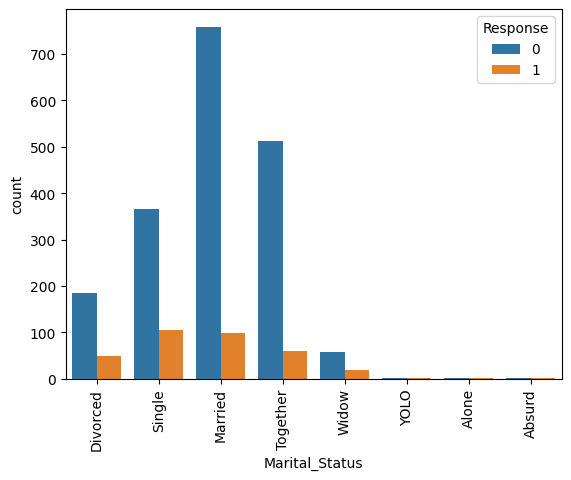

In [12]:
sns.countplot(df,x='Marital_Status',hue= 'Response')
plt.xticks(rotation=90)
plt.show()

* basically who are single , married or together they are not giving good amount of response.

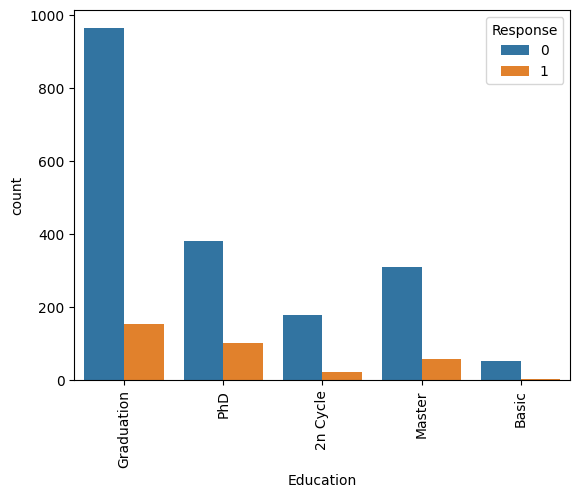

In [13]:
sns.countplot(df,x='Education',hue= 'Response')
plt.xticks(rotation=90)
plt.show()

In [14]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: xlabel='Income'>

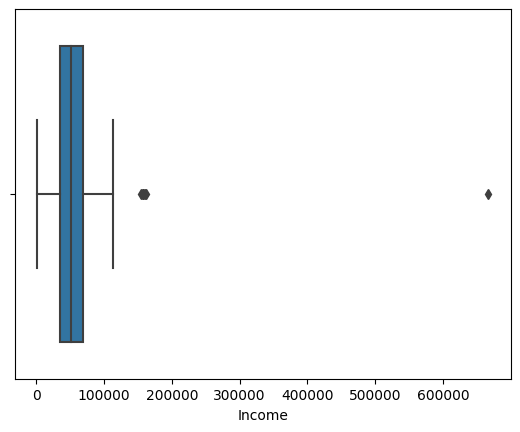

In [15]:
sns.boxplot(x=df['Income'])

In [16]:
df_filtered = df[df['Income'] > 200000]
df_filtered.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,year,month,day
527,1977,Graduation,Together,666666.0,1,0,23,9,14,18,...,1,12,4,3,6,0,0,2013,2,6


* using boxplot we have identified the outlier in the dataset , and after identifying the outlier we have removed it from the dataset using the filer first we found the index and then using the drop function we have removed the dataset.

In [17]:
df = df.drop(index= 527)

<Axes: xlabel='Income'>

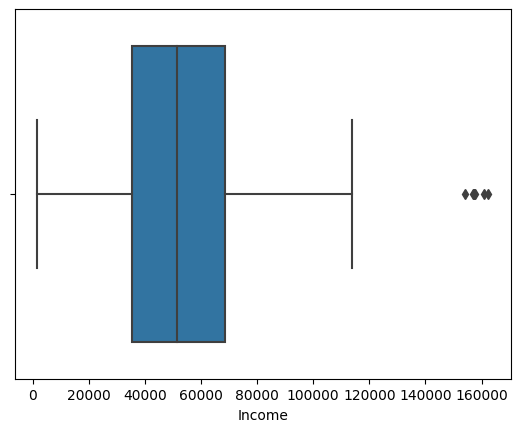

In [18]:
sns.boxplot(x=df['Income'])

In [19]:
df['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [20]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,189,218,1,4,1,1,0,2014,6,16
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,37,1,7,5,1,0,2014,6,15
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,2,30,1,3,2,0,0,2014,5,13
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,0,1,1,7,0,0,2014,11,5
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,0,34,2,3,7,1,0,2014,8,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2215 non-null   int64  
 1   Education          2215 non-null   object 
 2   Marital_Status     2215 non-null   object 
 3   Income             2215 non-null   float64
 4   Kidhome            2215 non-null   int64  
 5   Teenhome           2215 non-null   int64  
 6   Recency            2215 non-null   int64  
 7   MntWines           2215 non-null   int64  
 8   MntFruits          2215 non-null   int64  
 9   MntMeatProducts    2215 non-null   int64  
 10  MntFishProducts    2215 non-null   int64  
 11  MntSweetProducts   2215 non-null   int64  
 12  MntGoldProds       2215 non-null   int64  
 13  NumDealsPurchases  2215 non-null   int64  
 14  NumWebPurchases    2215 non-null   int64  
 15  NumWebVisitsMonth  2215 non-null   int64  
 16  Response           2215 non-n

* we will going to divide the income section into three part which is the small , medium and high earning individuals which can provide us more information on  the subscroption part.

* 25%       35284.000000
50%       51373.000000
75%       68487.000000

 * i will be using the list comprehension for this.

In [22]:
# data['section_earners'] = data['Income'].apply(lambda x : x in x if x < 35284  )

* Whenever writing the function using the data['columns_name'].apply(function_name)

In [23]:
df['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

so income is the contienous variable and we are checking or segrigating the condition as a way to measuere or see the impact on it on the campaign.

In [24]:
percentiles = df['Income'].quantile([0.25,0.50,0.75])

In [25]:
percentiles

0.25    35284.0
0.50    51373.0
0.75    68487.0
Name: Income, dtype: float64

In [26]:
percentiles[0.25]

35284.0

* created this function to segrigate different parts of income.

In [27]:
def income_cat(x):
    if x < percentiles[0.25]:
        return 'low wage earner'
    elif x < percentiles[0.50]:
        return 'medium wage earner'
    else:
        return 'high wage earner'

In [28]:
df['wage_earner'] = df['Income'].apply(income_cat)

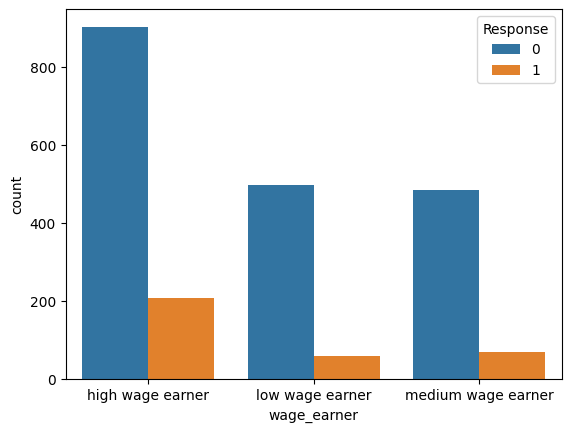

In [29]:
sns.countplot(df, x= 'wage_earner',hue = 'Response')
plt.show()

* with this we can see there is no special pattern that we can find out which is based on the income.

# Encoding variable

In [30]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,year,month,day,wage_earner
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,1,1,0,2014,6,16,high wage earner
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,5,1,0,2014,6,15,high wage earner
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,0,0,2014,5,13,high wage earner
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,7,0,0,2014,11,5,low wage earner
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,7,1,0,2014,8,4,low wage earner


In [31]:
df_encoded = pd.get_dummies(df, dtype= int)

In [32]:
df_encoded  = df_encoded.drop(columns=['wage_earner_high wage earner','MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts'])

In [33]:
# full correlation table
df_encoded.corr().style.background_gradient(cmap='viridis')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Response,Complain,year,month,day,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,wage_earner_low wage earner,wage_earner_medium wage earner
Year_Birth,1.000000,-0.198064,0.233376,-0.350609,-0.016023,-0.017653,-0.064030,-0.058953,-0.152951,0.123833,0.023825,-0.030380,-0.027278,0.007052,-0.000478,0.084473,0.114047,0.068291,-0.069263,-0.121869,0.015511,0.012855,-0.072518,0.049818,0.119441,-0.053465,-0.158128,0.010494,0.250653,-0.036002
Income,-0.198064,1.000000,-0.514935,0.034363,0.006945,0.507959,0.389204,-0.108457,0.458812,-0.650564,0.161049,-0.030583,0.026796,0.000353,-0.022799,-0.063484,-0.232572,0.009351,0.019559,0.102183,0.028490,-0.013999,0.013738,-0.009039,-0.023532,0.005573,0.039516,-0.004942,-0.718710,-0.239206
Kidhome,0.233376,-0.514935,1.000000,-0.039450,0.011919,-0.373350,-0.354857,0.216594,-0.371895,0.447462,-0.077733,0.041034,0.052976,0.001255,-0.008530,0.019642,0.055394,-0.002206,0.013240,-0.043611,-0.024729,0.038316,-0.017678,0.018313,0.014465,0.008536,-0.071882,-0.024729,0.377528,0.234810
Teenhome,-0.350609,0.034363,-0.039450,1.000000,0.013466,-0.176726,-0.020152,0.386754,0.161948,0.131386,-0.154114,0.003267,-0.009507,0.003668,-0.000524,-0.055383,-0.120009,-0.024550,0.023352,0.092145,-0.027939,0.010899,0.053358,0.007946,-0.099690,0.026111,0.048189,0.027315,-0.272318,0.184776
Recency,-0.016023,0.006945,0.011919,0.013466,1.000000,-0.005971,0.017417,0.002470,-0.005803,-0.018453,-0.199981,0.013599,-0.027086,-0.005455,0.018348,-0.005599,-0.003167,0.030599,-0.026190,-0.008464,0.004129,-0.023782,0.005468,-0.019597,0.003146,0.020638,-0.001444,-0.047804,-0.017847,0.013533
MntFruits,-0.017653,0.507959,-0.373350,-0.176726,-0.005971,1.000000,0.396443,-0.134416,0.302001,-0.418706,0.122391,-0.005338,-0.054968,0.000233,-0.022091,0.023739,-0.060582,0.114223,-0.055658,-0.082273,0.043922,-0.020695,0.009155,-0.014231,0.011747,-0.012465,0.026085,-0.017649,-0.296455,-0.265588
MntGoldProds,-0.064030,0.389204,-0.354857,-0.020152,0.017417,0.396443,1.000000,0.052161,0.407005,-0.247638,0.140232,-0.031163,-0.143752,0.020486,0.001195,0.017636,-0.064518,0.130947,-0.032498,-0.117679,0.092849,-0.012069,0.015244,-0.017383,-0.006760,-0.008250,0.043205,-0.001149,-0.302406,-0.178692
NumDealsPurchases,-0.058953,-0.108457,0.216594,0.386754,0.002470,-0.134416,0.052161,1.000000,0.241646,0.346003,0.003617,0.000536,-0.185330,-0.001821,-0.002292,-0.010286,-0.043272,-0.006535,0.023523,0.010096,-0.005045,0.025731,0.020015,0.024753,-0.051651,0.000729,0.003182,0.041845,-0.078497,0.129339
NumWebPurchases,-0.152951,0.458812,-0.371895,0.161948,-0.005803,0.302001,0.407005,0.241646,1.000000,-0.051179,0.151367,-0.016660,-0.169712,0.021519,0.007778,-0.036872,-0.126704,0.011319,-0.008129,0.066613,-0.006425,0.012284,0.028025,-0.000173,-0.044443,0.004115,0.036631,0.031964,-0.436831,-0.144783
NumWebVisitsMonth,0.123833,-0.650564,0.447462,0.131386,-0.018453,-0.418706,-0.247638,0.346003,-0.051179,1.000000,-0.002156,0.019798,-0.253335,0.033821,0.039875,0.018350,0.101132,-0.014293,-0.020742,-0.014588,-0.047334,0.015406,0.023740,0.012171,-0.008245,-0.010342,-0.029885,0.033235,0.399918,0.243746


In [34]:
df_encoded.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,wage_earner_low wage earner,wage_earner_medium wage earner
0,1970,84835.0,0,0,0,104,218,1,4,1,...,0,0,1,0,0,0,0,0,0,0
1,1961,57091.0,0,0,0,5,37,1,7,5,...,0,0,0,0,1,0,0,0,0,0
2,1958,67267.0,0,1,0,11,30,1,3,2,...,0,0,0,1,0,0,0,0,0,0
3,1967,32474.0,1,1,0,0,0,1,1,7,...,0,0,0,0,0,1,0,0,1,0
4,1989,21474.0,1,0,0,16,34,2,3,7,...,0,0,0,0,1,0,0,0,1,0


# train test split

In [35]:
X = df_encoded.drop(columns ='Response')
y = df_encoded['Response']

In [36]:
X.shape

(2215, 29)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , roc_auc_score

import xgboost

from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV



In [38]:
train_X , test_X , train_y , test_y = train_test_split( X , y , test_size =0.2 , random_state = 42)

# Modelling Dataset

In [39]:
model_xg = xgboost.XGBClassifier(random_state=42)

model_xg.fit(train_X , train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
y_train_hat  = model_xg.predict(train_X)

y_test_hat = model_xg.predict(test_X)

print("----------------------------------------for the train dataset")
print(classification_report(train_y , y_train_hat))

print("----------------------------------------for the test dataset")
print(classification_report(test_y , y_test_hat))

print("----------------------------------------for the train dataset")
print(roc_auc_score(train_y , y_train_hat))

print("----------------------------------------for the test dataset")
print(roc_auc_score(test_y , y_test_hat))

----------------------------------------for the train dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1502
           1       0.98      0.97      0.98       270

    accuracy                           0.99      1772
   macro avg       0.99      0.98      0.99      1772
weighted avg       0.99      0.99      0.99      1772

----------------------------------------for the test dataset
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       380
           1       0.50      0.40      0.44        63

    accuracy                           0.86       443
   macro avg       0.70      0.67      0.68       443
weighted avg       0.85      0.86      0.85       443

----------------------------------------for the train dataset
0.9820017754105638
----------------------------------------for the test dataset
0.6655179615705932


### Now the main part comes where we find the feature importance score for the dataset and which columns are responsible for giving this result.

In [41]:
feature_importance = model_xg.feature_importances_

In [42]:
feature_map = pd.DataFrame({'columns': X.columns, 'score':feature_importance})

In [43]:
feature_map.head()

,columns,score
0,Year_Birth,0.030632
1,Income,0.054205
2,Kidhome,0.038284
3,Teenhome,0.073930
4,Recency,0.046426
